In [1]:
from google.colab import files

uploaded = files.upload()

Saving cumulative.csv to cumulative.csv


In [2]:
import pandas as pd

dataset = pd.read_csv('cumulative.csv')

print(dataset.head())

   rowid     kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2      3  10811496  K00753.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  ...  \
0      1.000              0              0              0  ...   
1      0.969              0              0              0  ...   
2      0.000              0              1              0  ...   
3      0.000              0              1              0  ...   
4      1.000              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0           -81.0      4.467           0.064    

In [3]:
columns = ['koi_disposition', 'koi_period', 'koi_impact', 'koi_duration', 'koi_depth',
            'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad']
filtered_dataset = dataset[columns]

In [4]:
print(filtered_dataset.head())

  koi_disposition  koi_period  koi_impact  koi_duration  koi_depth  koi_prad  \
0       CONFIRMED    9.488036       0.146       2.95750      615.8      2.26   
1       CONFIRMED   54.418383       0.586       4.50700      874.8      2.83   
2  FALSE POSITIVE   19.899140       0.969       1.78220    10829.0     14.60   
3  FALSE POSITIVE    1.736952       1.276       2.40641     8079.2     33.46   
4       CONFIRMED    2.525592       0.701       1.65450      603.3      2.75   

   koi_teq  koi_insol  koi_steff  koi_slogg  koi_srad  
0    793.0      93.59     5455.0      4.467     0.927  
1    443.0       9.11     5455.0      4.467     0.927  
2    638.0      39.30     5853.0      4.544     0.868  
3   1395.0     891.96     5805.0      4.564     0.791  
4   1406.0     926.16     6031.0      4.438     1.046  


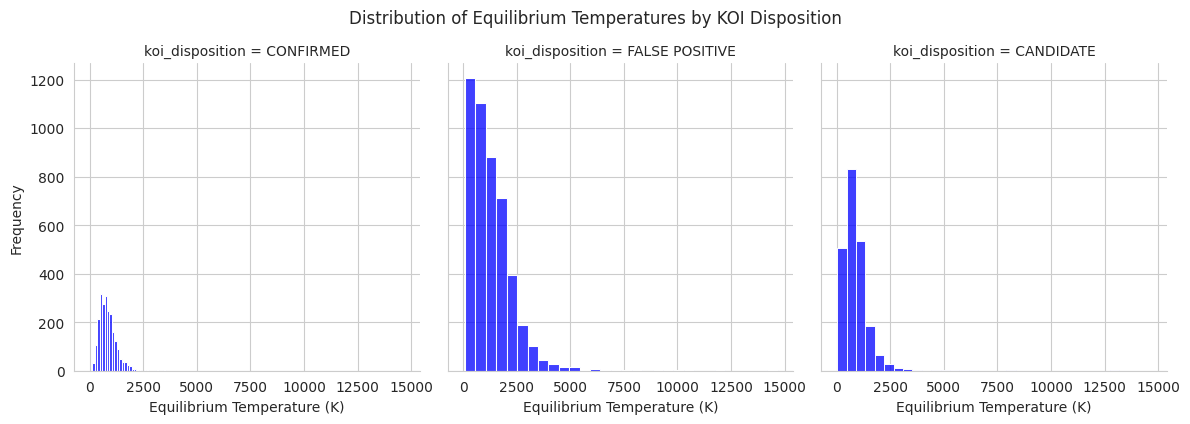

In [9]:

sns.set_style("whitegrid")


g = sns.FacetGrid(dataset, col="koi_disposition", height=4, aspect=1)
g.map(sns.histplot, "koi_teq", bins=30, kde=False, color="b")

g.set_axis_labels('Equilibrium Temperature (K)', 'Frequency')
g.fig.suptitle('Distribution of Equilibrium Temperatures by KOI Disposition', y=1.05)

plt.show()


In [10]:
confirmed_planets = dataset[dataset['koi_disposition'] == 'CONFIRMED']


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)


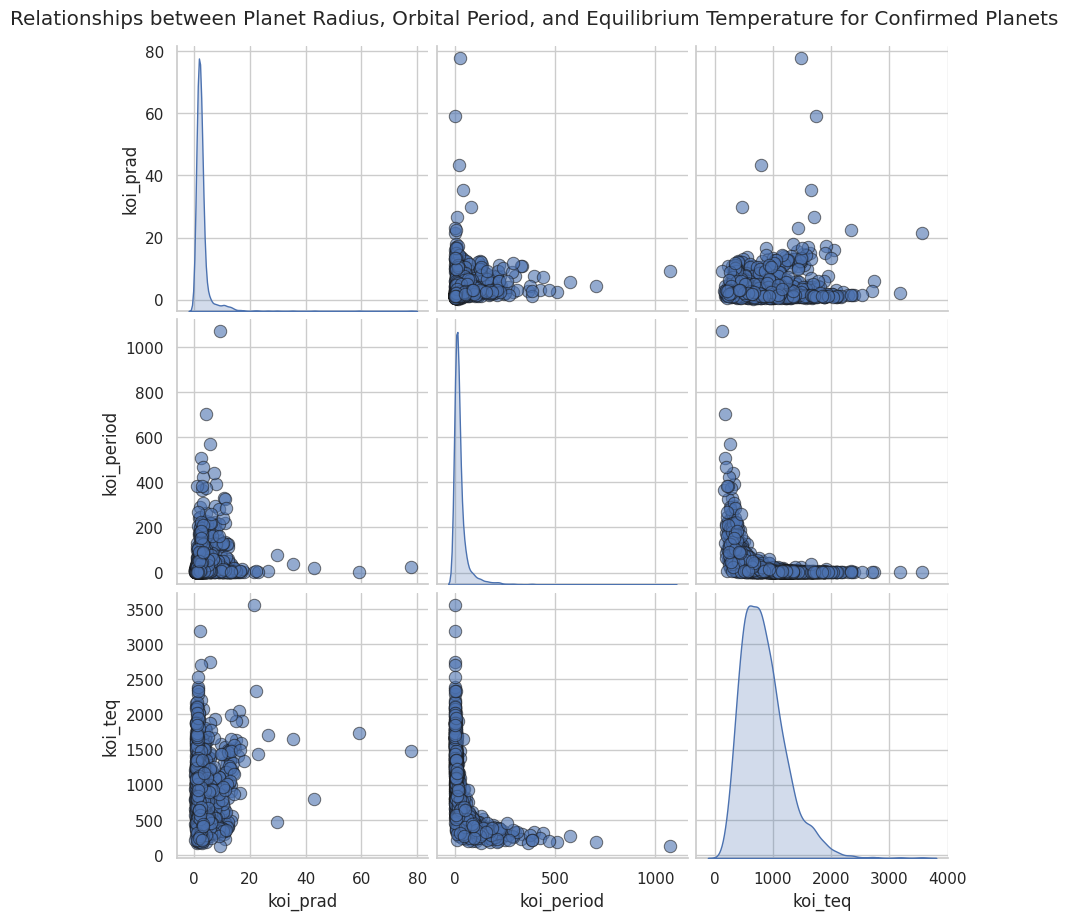

In [11]:

sns.set(style="whitegrid")


pair_plot = sns.pairplot(confirmed_planets,
                         vars=['koi_prad', 'koi_period', 'koi_teq'],
                         height=3,
                         aspect=1,
                         plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                         diag_kind='kde',  # Kernel density estimate for the diagonal plots
                         diag_kws={'shade': True})


pair_plot.fig.suptitle('Relationships between Planet Radius, Orbital Period, and Equilibrium Temperature for Confirmed Planets', y=1.02)


plt.show()


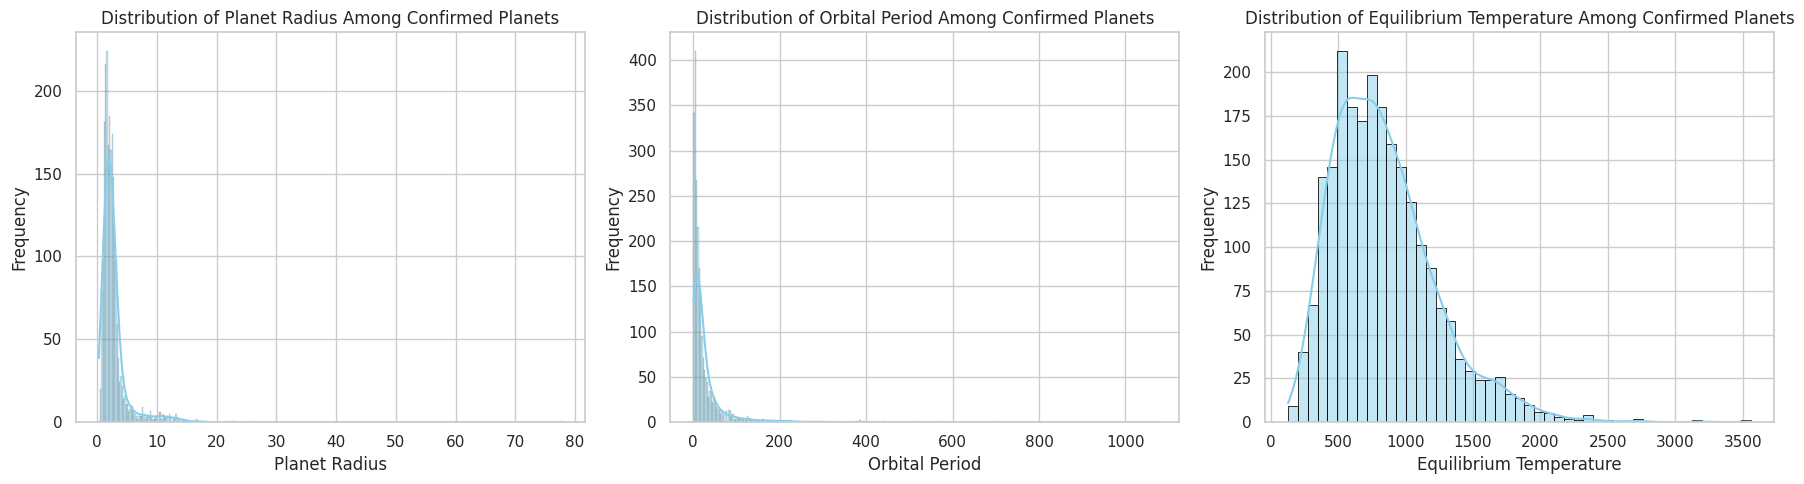

In [13]:
# Define the list of factors and their titles
factors = ['koi_prad', 'koi_period', 'koi_teq']
titles = ['Planet Radius', 'Orbital Period', 'Equilibrium Temperature']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Loop through each factor and create a histogram on each subplot
for i, factor in enumerate(factors):
    sns.histplot(confirmed_planets[factor], ax=axes[i], color='skyblue', kde=True, edgecolor='black')
    axes[i].set_title(f'Distribution of {titles[i]} Among Confirmed Planets')
    axes[i].set_xlabel(f'{titles[i]}')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()


In [5]:
filtered_dataset.dropna(inplace=True)

<ipython-input-5-fc7e8b342835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.dropna(inplace=True)


In [6]:
print(filtered_dataset.isnull().sum())

koi_disposition    0
koi_period         0
koi_impact         0
koi_duration       0
koi_depth          0
koi_prad           0
koi_teq            0
koi_insol          0
koi_steff          0
koi_slogg          0
koi_srad           0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

X = filtered_dataset.drop('koi_disposition', axis=1)  # drop labels to create features
y = filtered_dataset['koi_disposition']  # target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import classification_report, accuracy_score

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7073524085476277
                precision    recall  f1-score   support

     CANDIDATE       0.52      0.39      0.45       698
     CONFIRMED       0.66      0.75      0.70       691
FALSE POSITIVE       0.80      0.85      0.82      1372

      accuracy                           0.71      2761
     macro avg       0.66      0.66      0.66      2761
  weighted avg       0.69      0.71      0.70      2761



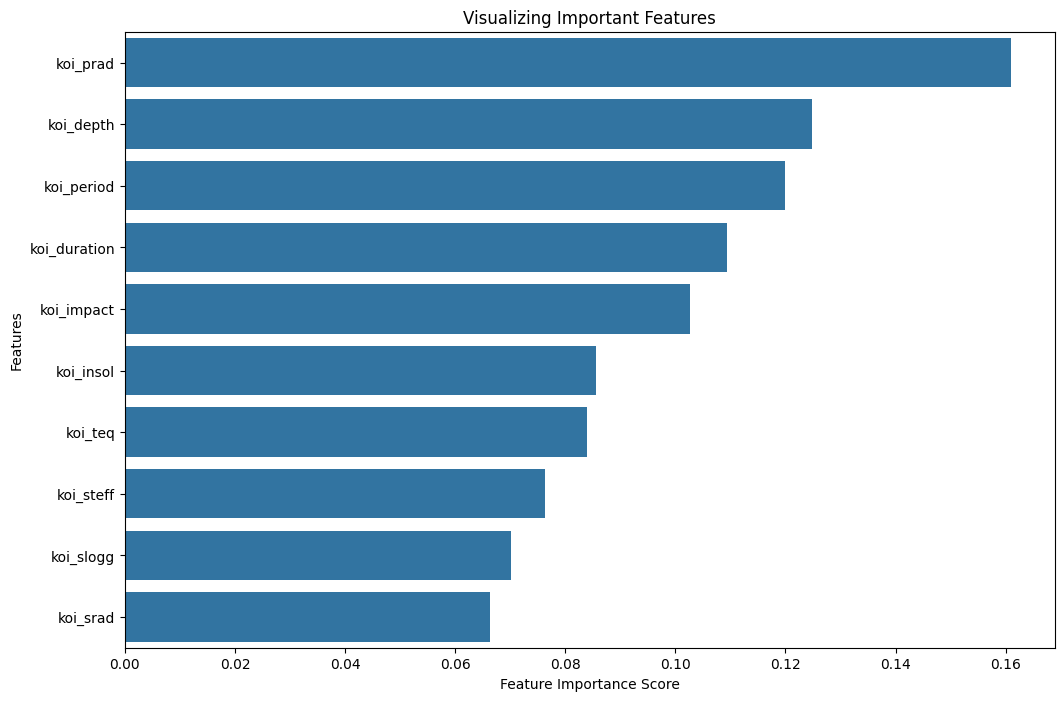

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

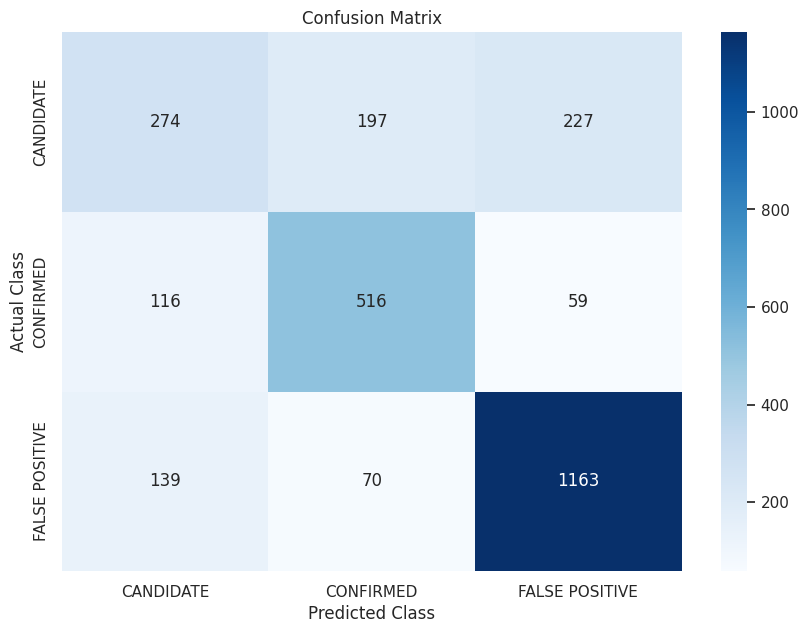

In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')


plt.show()
